In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%load_ext autoreload

# Load Data

In [2]:
test_data = pd.read_csv('data/test_v2.csv')
train_data = pd.read_csv('data/train_v2.csv')

# Data Pipeline

In [3]:
%autoreload
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from include.DatetimeFromTimestamp import DatetimeFromTimestamp
from include.DataFrameDropper import DataFrameDropper
from include.DataFrameSelector import DataFrameSelector
from include.FilterNMostCommon import FilterNMostCommon


pipeline_normal = Pipeline([
    ('datetime_creator', DatetimeFromTimestamp()),
])

pipeline_1hot = Pipeline([
    ('dataframe_selector', DataFrameSelector(['product_category'])),
    ('filter_n_most_common', FilterNMostCommon(N=10, minRelFreq=0.01, attribute_name='product_category')),
    ('1hot_encoder', OneHotEncoder(sparse = False))
])

pipeline_analysis = FeatureUnion(transformer_list=[
    ('pipeline_normal', pipeline_normal),
    ('pipeline_1hot', pipeline_1hot),
])

In [4]:
train_data_treated = pipeline_analysis.fit_transform(train_data)
categories = pipeline_1hot.named_steps['1hot_encoder'].categories_
cols_train = list(train_data) + ['datetime'] + categories[0].tolist()

In [5]:
test_data_treated = pipeline_analysis.transform(test_data)
cols_test = list(test_data) + ['datetime'] + categories[0].tolist()

### Convert to DataFrame
Not necessary, we can always use the index from cols

In [9]:
train_data_treated = pd.DataFrame(train_data_treated, columns = cols_train)
train_data_treated.head()

,id,timestamp,product_id,product_department,product_category,card_id,user_id,C15,C16,C17,...,C20,C21,amount,isfraud,datetime,28905ebd,3e814130,50e219e0,Other,f028772b
0,0,1413851531856,f3845767,1fbe01fe,28905ebd,ecad2386,a99f214a,320,50,1722,...,-1,79,184.09,0,2014-10-21 00:32:11.856000,1,0,0,0,0
1,1,1413851817483,f3845767,1fbe01fe,28905ebd,ecad2386,a99f214a,320,50,1722,...,100084,79,184.09,0,2014-10-21 00:36:57.483000,1,0,0,0,0
2,2,1413852597526,f3845767,1fbe01fe,28905ebd,ecad2386,a99f214a,320,50,1722,...,100084,79,184.09,0,2014-10-21 00:49:57.526000,1,0,0,0,0
3,3,1413851283020,f3845767,1fbe01fe,28905ebd,ecad2386,a99f214a,320,50,1722,...,100084,79,184.09,0,2014-10-21 00:28:03.020000,1,0,0,0,0
4,4,1413849935779,9166c161,fe8cc448,0569f928,ecad2386,a99f214a,320,50,2161,...,-1,157,196.98,0,2014-10-21 00:05:35.779000,0,0,0,1,0


In [10]:
test_data_treated = pd.DataFrame(test_data_treated, columns = cols_test)
test_data_treated.head()

,id,timestamp,product_id,product_department,product_category,card_id,user_id,C15,C16,C17,...,C19,C20,C21,amount,datetime,28905ebd,3e814130,50e219e0,Other,f028772b
0,32263877,1414540656054,c4e18dd6,85f751fd,50e219e0,92f5800b,a99f214a,320,50,2424,...,161,100193,71,191.77,2014-10-28 23:57:36.054000,0,0,1,0,0
1,32263886,1414540614666,968765cd,6399eda6,f028772b,ecad2386,a99f214a,320,50,2526,...,167,100075,221,200.45,2014-10-28 23:56:54.666000,0,0,0,0,1
2,32263890,1414540692012,7e091613,e151e245,f028772b,ecad2386,a99f214a,320,50,1872,...,39,-1,23,169.51,2014-10-28 23:58:12.012000,0,0,0,0,1
3,32263895,1414540720045,7e091613,e151e245,f028772b,ecad2386,a99f214a,320,50,1872,...,39,-1,23,169.51,2014-10-28 23:58:40.045000,0,0,0,0,1
4,32263896,1414540641750,c4e18dd6,85f751fd,50e219e0,73206397,cc6c0613,320,50,2665,...,35,-1,221,191.77,2014-10-28 23:57:21.750000,0,0,1,0,0


# Overall analysis
* There are no null values in neither of the dataset, however, the are clearly values which are ***imputed to -1*** in the `C20` attribute as stated in Kaggle. These were probably nulls.
* 17% of the entries in the data are fraudulent.

In [56]:
test_data_treated.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32369524 entries, 0 to 32369523
Data columns (total 21 columns):
id                    32369524 non-null object
timestamp             32369524 non-null object
product_id            32369524 non-null object
product_department    32369524 non-null object
product_category      32369524 non-null object
card_id               32369524 non-null object
user_id               32369524 non-null object
C15                   32369524 non-null object
C16                   32369524 non-null object
C17                   32369524 non-null object
C18                   32369524 non-null object
C19                   32369524 non-null object
C20                   32369524 non-null object
C21                   32369524 non-null object
amount                32369524 non-null object
isfraud               32369524 non-null object
datetime              32369524 non-null object
28905ebd              32369524 non-null object
3e814130              32369524 non-null

In [54]:
train_data_treated.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32369524 entries, 0 to 32369523
Data columns (total 22 columns):
id                    32369524 non-null object
timestamp             32369524 non-null object
product_id            32369524 non-null object
product_department    32369524 non-null object
product_category      32369524 non-null object
card_id               32369524 non-null object
user_id               32369524 non-null object
C15                   32369524 non-null object
C16                   32369524 non-null object
C17                   32369524 non-null object
C18                   32369524 non-null object
C19                   32369524 non-null object
C20                   32369524 non-null object
C21                   32369524 non-null object
amount                32369524 non-null object
isfraud               32369524 non-null object
datetime              32369524 non-null object
28905ebd              32369524 non-null object
3e814130              32369524 non-null

### Value counts

In [32]:
print("Train: ")
fraud_counts = train_data['isfraud'].value_counts()
print(fraud_counts)
print(fraud_counts / train_data.shape[0])

Train: 
0    26819827
1     5549697
Name: isfraud, dtype: int64
0    0.828552
1    0.171448
Name: isfraud, dtype: float64


### Histograms

In [6]:
train_hist = train_data[['C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'amount']]

[]

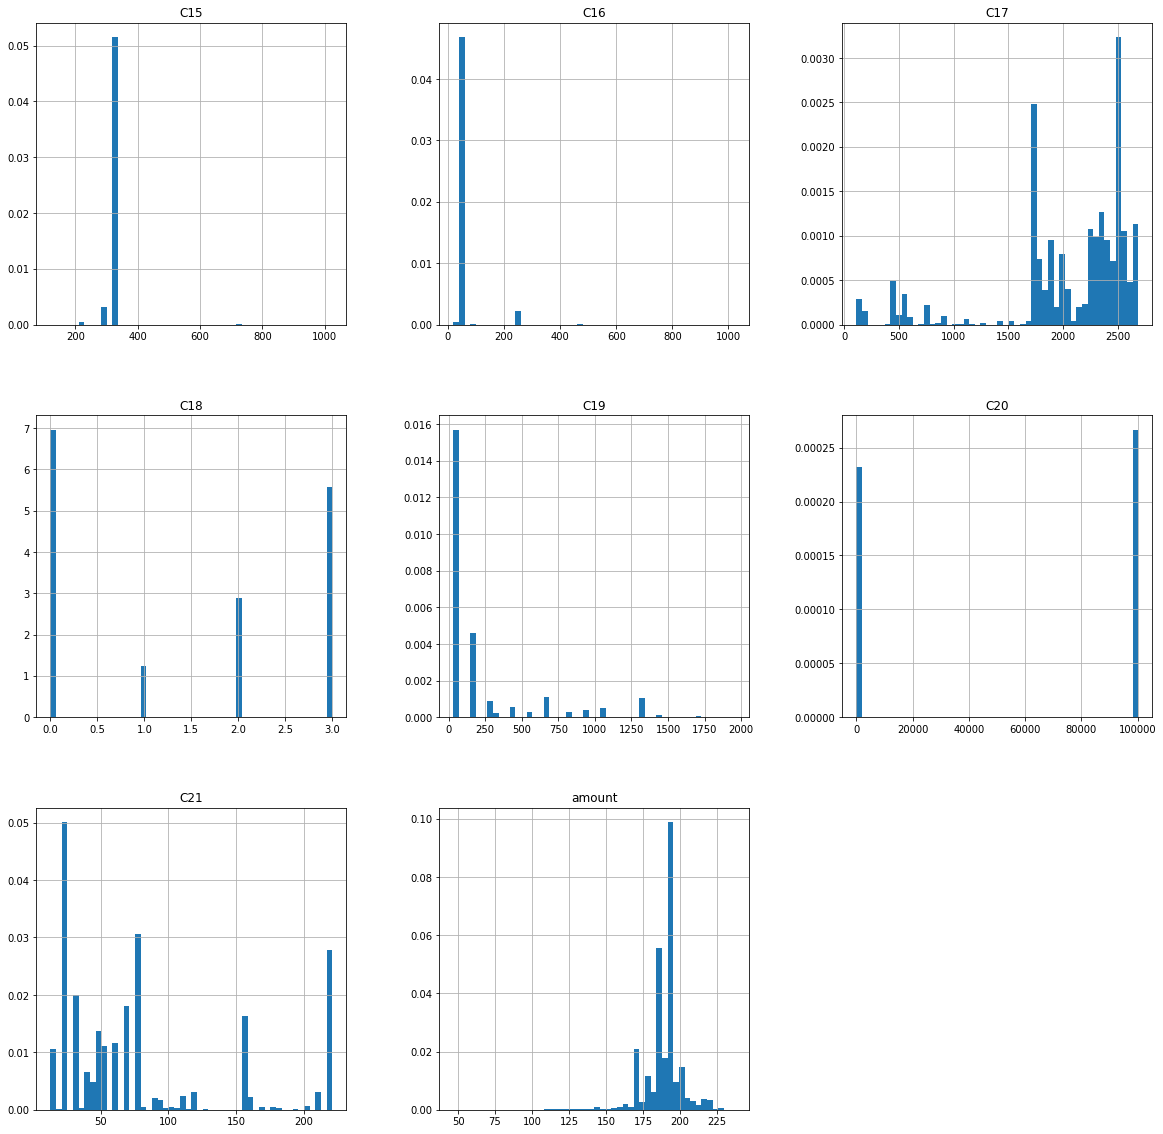

In [7]:
train_hist.hist(bins = 50, figsize=(20,20), density=True)
plt.plot()

In [63]:
train_data['C20'].value_counts()[:5]

-1         15059166
 100084     2033777
 100111     1448778
 100148     1374808
 100077     1306586
Name: C20, dtype: int64

# One by one analyzis
### timestamp/datetime
* The train data contains data from 8 days, while the test data contains data from the 2 days after.
* Although there doesn't seem to exist a clear relevance of time of the day in the fraction of frauds, it should be used also.
* Thoughout the days the fraud rate is also the same.

In [40]:
train_data_treated.loc[0,'datetime'], train_data_treated.iloc[-1]['datetime']

(Timestamp('2014-10-21 00:32:11.856000'),
 Timestamp('2014-10-28 23:19:01.526000'))

In [55]:
test_data_treated.loc[0,'datetime'], test_data_treated.iloc[-1]['datetime']

(Timestamp('2014-10-28 23:57:36.054000'),
 Timestamp('2014-10-30 23:55:45.814000'))

### Hour

In [11]:
datetime = train_data_treated['datetime']
train_data_treated['hour_of_day'] = [dt.time().hour for dt in datetime]
train_data_treated['hour_of_day'].value_counts(sort=False)

0      658895
1      774563
2      983039
3     1049410
4     1404619
5     1605674
6     1427460
7     1472916
8     1729277
9     1894252
10    1709843
11    1670682
12    1775172
13    1944962
14    1720095
15    1646324
16    1661153
17    1693217
18    1466573
19    1058561
20     892866
21     784973
22     716090
23     628908
Name: hour_of_day, dtype: int64

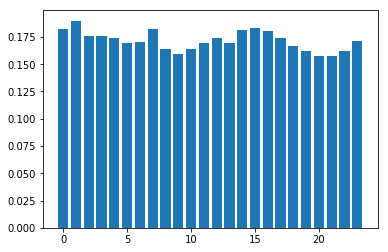

In [12]:
train_data_treated['isfraud'] = train_data_treated['isfraud'].astype(int)
frauds_by_hour_of_day = train_data_treated[['hour_of_day', 'isfraud']].groupby(by='hour_of_day').mean()
frauds_by_hour_of_day.index
plt.bar(frauds_by_hour_of_day.index, frauds_by_hour_of_day['isfraud'])
plt.show()

### Day

In [17]:
train_data_treated['day'] = [dt.day for dt in datetime]
train_data_treated['day'].value_counts(sort=False)

21    4122995
22    5337126
23    3870752
24    3335302
25    3363122
26    3835892
27    3225010
28    5279325
Name: day, dtype: int64

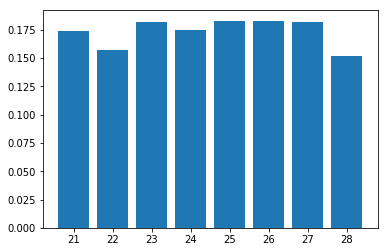

In [18]:
frauds_by_day = train_data_treated[['day', 'isfraud']].groupby(by='day').mean()
frauds_by_day.index
plt.bar(frauds_by_day.index, frauds_by_day['isfraud'])
plt.show()

## Product
* Almost every department is linked to a single category, which makes the category information very redundant when using the department.
* ID's in average are linked to 2.75 different `department_category` combinations, separating the ID information from this combination would also result in a lot of redudancy.
* Therefore, it is best to use the concatenated `cat_dep_id` attribute
* Different product categories have different fraud rates, hence it would probably be useful to label encode them with the values sorted by fraud probability

In [25]:
len(train_data['product_category'].value_counts())

26

In [26]:
len(train_data['product_department'].value_counts())

4551

In [29]:
category_department = pd.Series([a + '-' + b for a, b in zip(train_data['product_category'], train_data['product_department'])])
len(category_department.value_counts())

4552

In [27]:
len(train_data['product_id'].value_counts())

7298

In [28]:
category_department_id = pd.Series([a + '-' + b + '-' + c for (a, b), c in zip(zip(train_data['product_category'], train_data['product_department']), train_data['product_id'])])
len(category_department_id.value_counts())

20036

In [30]:
20036 / 7298

2.745409701288024

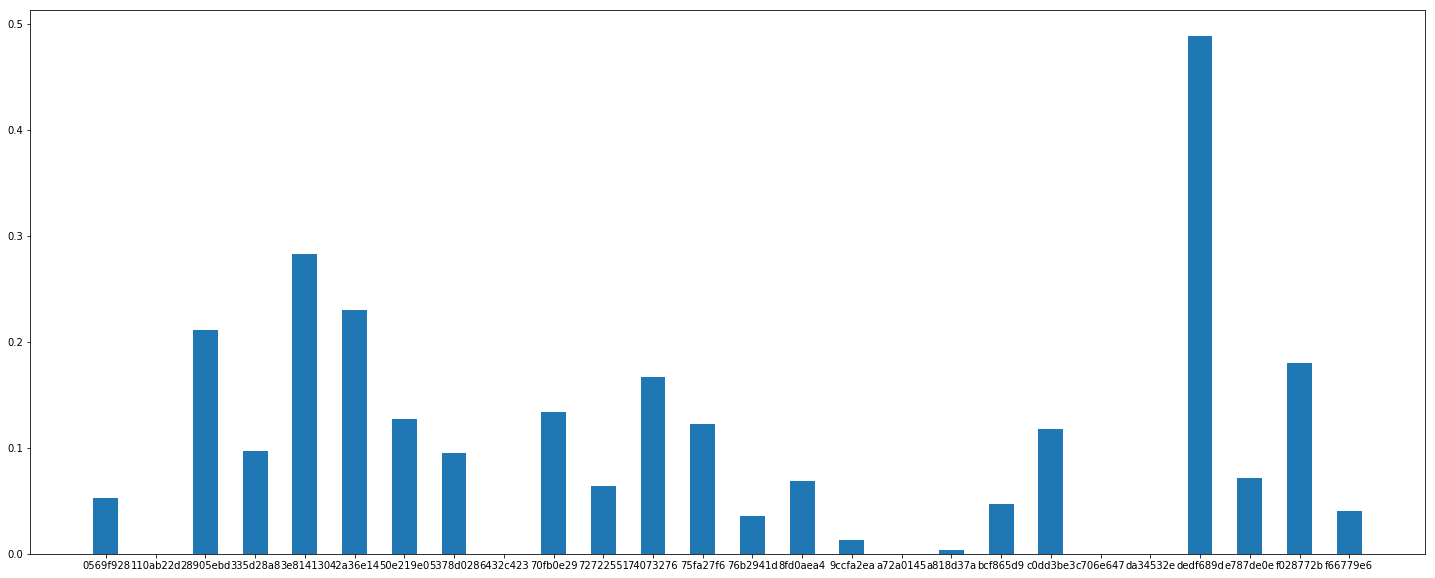

In [115]:
frauds_by_category = train_data[['product_category', 'isfraud']].groupby(by='product_category').mean()
plt.figure(figsize=(25,10))
plt.bar(frauds_by_category.index, frauds_by_category['isfraud'], width=0.5)
plt.show()

## User & Card
* We want to know if the same happens with `user_id` and `card_id`
* Each card is clearly almost always used only by one user, thus, we have a lot of redundant information again.
* Perhaps it would not make a lot of sense in a live system prediction through the `user_id` or `card_id`, however, it will likely be helpful here.

In [119]:
len(train_data['user_id'].value_counts())

2217213

In [120]:
len(train_data['card_id'].value_counts())

8094

In [121]:
card_user = pd.Series([a + '-' + b for a, b in zip(train_data['card_id'], train_data['user_id'])])
len(card_user.value_counts())

2316047

In [123]:
2316047/2217213

1.0445757804956042

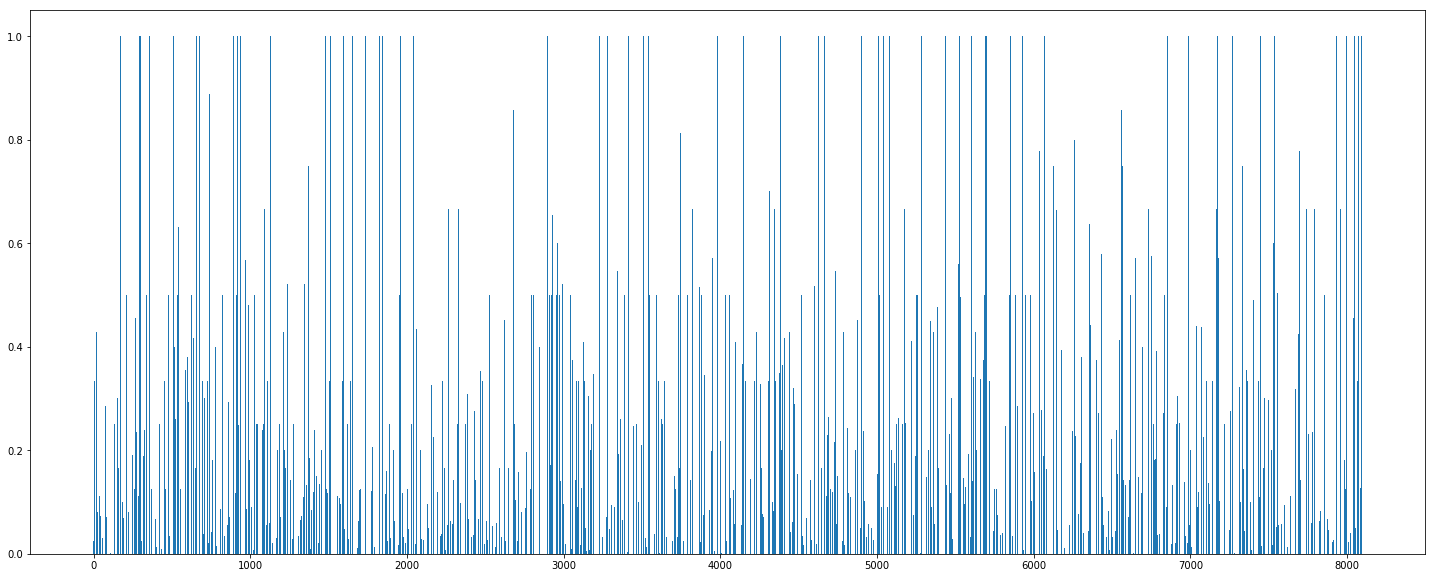

In [128]:
frauds_by_card = train_data[['card_id', 'isfraud']].groupby(by='card_id').mean()
plt.figure(figsize=(25,10))
plt.bar(list(range(len(frauds_by_card))), frauds_by_card['isfraud'])
plt.show()

## Anonymized Categorical Variables
* In the kaggle page it said that the `Cxx` attributes are categorical. I would like to check if that is true
* They appear to be because they are all integeres and with no seamless connection correlation to the fraud rate.
* Given that `C18` has only 4 different values that are evenly enough distributed, perhaps one-hot encoding them would be good.
* `C15` and `C16` have the exact same amounts for a lot of values. After analyzing the concatenation of the 2 attributes we can see that it produces almost the same number of unique values, which means we can (and should) use them that way
* `C18` and `C17` also have 1.05 ratio of dependency

## C15

In [129]:
train_data['C15'].value_counts()

320     30164042
300      1852330
216       283371
728        63166
120         2450
480         1875
1024        1269
768         1021
Name: C15, dtype: int64

In [142]:
x = train_data['C15']
x.min(), x.max()

(120, 1024)

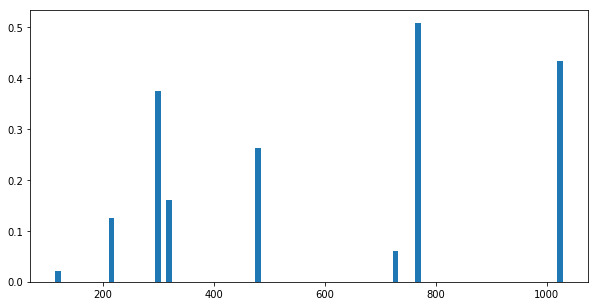

In [35]:
frauds_by_C15 = train_data[['C15', 'isfraud']].groupby(by='C15').mean()
plt.figure(figsize=(10,5))
plt.bar(list(frauds_by_C15.index), frauds_by_C15['isfraud'], width=10)
plt.show()

## C16

In [130]:
train_data['C16'].value_counts()

50      30440126
250      1487082
36        283371
480        89164
90         63166
20          2450
320         1875
768         1269
1024        1021
Name: C16, dtype: int64

In [143]:
x = train_data['C16']
x.min(), x.max()

(20, 1024)

In [11]:
frauds_by_C16

,isfraud
C16,
20,0.020816
36,0.125037
50,0.159458
90,0.060301
250,0.427809
320,0.263467
480,0.210017
768,0.433412
1024,0.508325


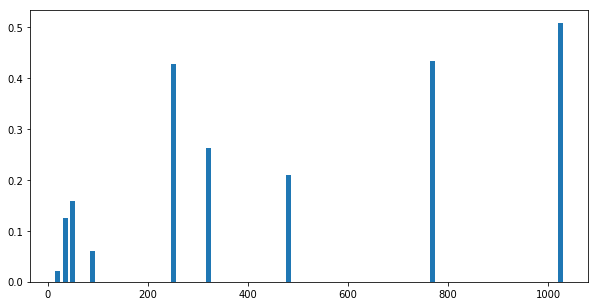

In [36]:
frauds_by_C16 = train_data[['C16', 'isfraud']].groupby(by='C16').mean()
plt.figure(figsize=(10,5))
plt.bar(frauds_by_C16.index, frauds_by_C16['isfraud'], width=10)
plt.show()

### C15 + C16

In [83]:
C15_C16 = pd.Series([str(a) + '-' + str(b) for a, b in zip(train_data['C15'], train_data['C16'])])
C15_C16.value_counts()

10


320-50      30074878
300-250      1487082
300-50        365248
216-36        283371
320-480        89164
728-90         63166
120-20          2450
480-320         1875
1024-768        1269
768-1024        1021
dtype: int64

## C17

In [144]:
len(train_data['C17'].value_counts())

372

In [146]:
x = train_data['C17']
x.min(), x.max()

(112, 2688)

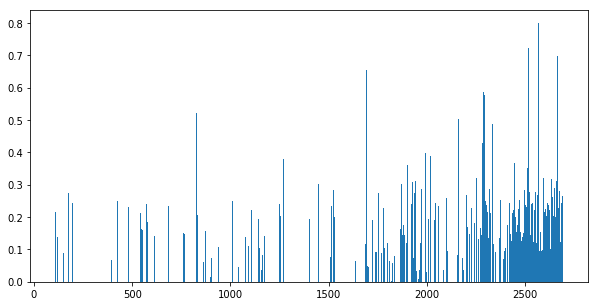

In [38]:
frauds_by_C17 = train_data[['C17', 'isfraud']].groupby(by='C17').mean()
plt.figure(figsize=(10,5))
plt.bar(frauds_by_C17.index, frauds_by_C17['isfraud'], width=5)
plt.show()

## C18

In [147]:
train_data['C18'].value_counts()

0    13520676
3    10819205
2     5605622
1     2424021
Name: C18, dtype: int64

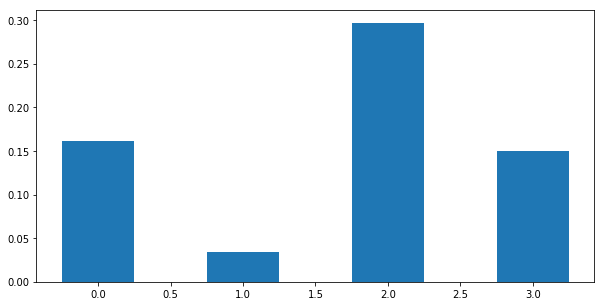

In [45]:
frauds_by_C18 = train_data[['C18', 'isfraud']].groupby(by='C18').mean()
plt.figure(figsize=(10,5))
plt.bar(frauds_by_C18.index, frauds_by_C18['isfraud'], width=0.5)
plt.show()

## C19

In [8]:
len(train_data['C19'].value_counts())

63

In [152]:
x = train_data['C19']
x.min(), x.max()

(33, 1959)

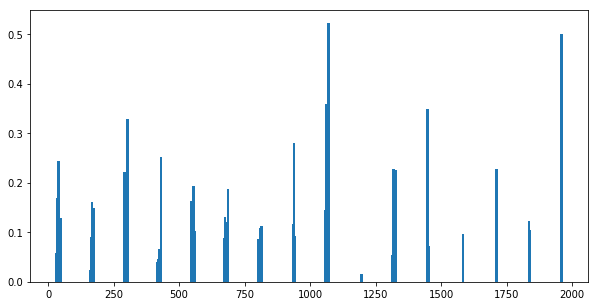

In [41]:
frauds_by_C19 = train_data[['C19', 'isfraud']].groupby(by='C19').mean()
plt.figure(figsize=(10,5))
plt.bar(frauds_by_C19.index, frauds_by_C19['isfraud'], width=10)
plt.show()

## C20

In [49]:
vc = train_data['C20'].value_counts()
print('\nSize: ',len(vc))
vc[:3]


Size:  172


-1         15059166
 100084     2033777
 100111     1448778
Name: C20, dtype: int64

In [159]:
x = train_data['C20']
x.min(), x.max()

(-1, 100248)

In [160]:
x = x[x != -1]
x.min(),x.max()

(100000, 100248)

[]

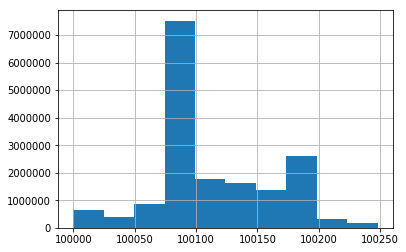

In [163]:
x.hist()
plt.plot()

In [68]:
frauds_by_C20[:1]

,isfraud
C20,
-1,0.194456


In [10]:
frauds_by_C20

,isfraud
C20,
-1,0.194456
100000,0.092080
100001,0.180725
100002,0.114857
100003,0.047644
100004,0.115081
100005,0.050887
100006,0.500000
100008,0.000000


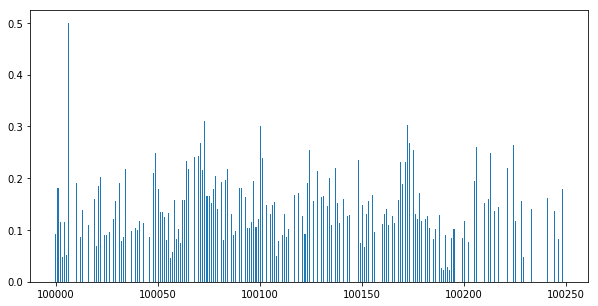

In [9]:
frauds_by_C20 = train_data[['C20', 'isfraud']].groupby(by='C20').mean()
frauds_by_C20_clean = frauds_by_C20[1:]
plt.figure(figsize=(10,5))
plt.bar(frauds_by_C20_clean.index, frauds_by_C20_clean['isfraud'], width=.5)
plt.show()

## C21

In [86]:
len(train_data['C21'].value_counts())

52

In [156]:
x = train_data['C21']
x.min(), x.max()

(13, 221)

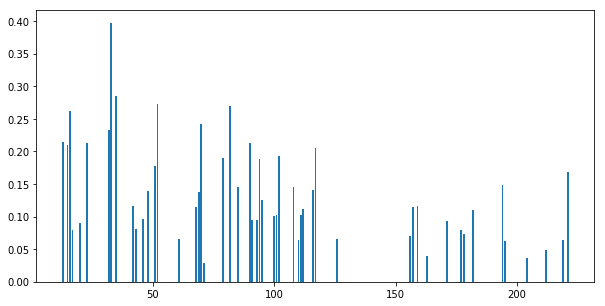

In [77]:
frauds_by_C21 = train_data[['C21', 'isfraud']].groupby(by='C21').mean()
plt.figure(figsize=(10,5))
plt.bar(frauds_by_C21.index, frauds_by_C21['isfraud'], width=.75)
plt.show()

### Combining `C18` with others

In [92]:
C18_C17 = pd.Series([str(a) + '-' + str(b) for a, b in zip(train_data['C18'], train_data['C17'])])
len(C18_C17.value_counts())

391

In [93]:
C18_C19 = pd.Series([str(a) + '-' + str(b) for a, b in zip(train_data['C18'], train_data['C19'])])
len(C18_C19.value_counts())

112

In [95]:
C18_C21 = pd.Series([str(a) + '-' + str(b) for a, b in zip(train_data['C18'], train_data['C21'])])
len(C18_C21.value_counts())

74

## Checking combinations of C19, C20 and C21

In [101]:
C19_C20 = pd.Series([str(a) + '-' + str(b) for a, b in zip(train_data['C19'], train_data['C20'])])
len(C19_C20.value_counts())

1918

In [102]:
C19_C21 = pd.Series([str(a) + '-' + str(b) for a, b in zip(train_data['C19'], train_data['C21'])])
len(C19_C21.value_counts())

186

In [103]:
C21_C20 = pd.Series([str(a) + '-' + str(b) for a, b in zip(train_data['C21'], train_data['C20'])])
len(C21_C20.value_counts())

2159

## Amount

# Correlations

In [165]:
corr_matrix = train_data[['C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'amount', 'isfraud']].corr()
corr_matrix

,C15,C16,C17,C18,C19,C20,C21,amount,isfraud
C15,1.000000,-0.086409,-0.003177,0.019357,0.048154,0.009145,-0.011479,0.016566,-0.032106
C16,-0.086409,1.000000,0.064617,0.078688,-0.078528,-0.046388,-0.072418,0.082174,0.133812
C17,-0.003177,0.064617,1.000000,-0.263515,-0.183348,0.026113,0.434140,0.257441,-0.056598
C18,0.019357,0.078688,-0.263515,1.000000,0.082197,0.020896,-0.582077,-0.054920,0.023604
C19,0.048154,-0.078528,-0.183348,0.082197,1.000000,0.103951,-0.215435,0.056989,0.002963
C20,0.009145,-0.046388,0.026113,0.020896,0.103951,1.000000,-0.035945,0.073147,-0.056971
C21,-0.011479,-0.072418,0.434140,-0.582077,-0.215435,-0.035945,1.000000,0.110930,-0.065579
amount,0.016566,0.082174,0.257441,-0.054920,0.056989,0.073147,0.110930,1.000000,-0.098828
isfraud,-0.032106,0.133812,-0.056598,0.023604,0.002963,-0.056971,-0.065579,-0.098828,1.000000


# Observing frauds

In [18]:
#a = train_data['user_id'].value_counts() 
a[a < 30]

4f2638e2    29
be91513c    29
ad5b1ded    29
a4d28d74    29
20419348    29
a9e5206e    29
7fce729a    29
caa5deaa    29
055acd14    29
1202cb62    29
79adbec1    29
b3e76e2e    29
fe6fe698    29
eff814d1    29
a2d145f0    29
03f85ebf    29
dd2ec838    29
fd222dd5    29
06239d2e    29
ce320dcb    29
cfe68cae    29
633dc08e    29
cb48f81d    29
cdb60770    29
09586b29    29
5d2df384    29
251c97ce    29
92454a51    29
b1e57fbd    29
d3490bf4    29
            ..
6f7ba7ea     1
62a60475     1
3b34d54d     1
899aecba     1
3bd06402     1
cb30953a     1
b233ebf5     1
30dfe019     1
477066d5     1
0150088a     1
ede6af8f     1
987f1763     1
c71201e5     1
166e4b03     1
22f32cb7     1
d2ead847     1
4157c3b2     1
38c71af5     1
a6c29266     1
a6c61e60     1
05d62b17     1
9c8dbea1     1
3707bc8f     1
48dee450     1
7082ea3f     1
af74d90f     1
91829dd8     1
56d29f30     1
62274dfb     1
355cddd7     1
Name: user_id, Length: 2205396, dtype: int64

In [19]:
train_data[train_data['user_id'] == '4f2638e2']

,id,timestamp,product_id,product_department,product_category,card_id,user_id,C15,C16,C17,C18,C19,C20,C21,amount,isfraud
2592636,2592636,1413894585084,8eb11125,39cffaa4,50e219e0,ecad2386,4f2638e2,320,50,2253,2,303,-1,52,149.06,0
2603166,2603166,1413899086392,e8cab48f,f17ebd97,50e219e0,ecad2386,4f2638e2,320,50,2253,2,303,-1,52,217.06,0
2666638,2666638,1413897322452,e8cab48f,f17ebd97,50e219e0,ecad2386,4f2638e2,320,50,2253,2,303,-1,52,217.06,0
6599112,6599112,1413975324564,e8cab48f,f17ebd97,50e219e0,ecad2386,4f2638e2,320,50,2476,2,167,-1,23,217.06,0
6646930,6646930,1413973524420,e8cab48f,f17ebd97,50e219e0,ecad2386,4f2638e2,320,50,2476,2,167,-1,23,217.06,0
26412721,26412721,1414435576305,19944fab,c6af341d,50e219e0,ecad2386,4f2638e2,320,50,2512,2,291,-1,52,209.97,0
29584925,29584925,1414498610271,c4e18dd6,c6af341d,50e219e0,ecad2386,4f2638e2,320,50,2512,2,291,-1,52,209.97,1
31210869,31210869,1414518736706,5888d1c7,f17ebd97,50e219e0,ecad2386,4f2638e2,320,50,2684,2,1327,-1,52,217.06,0
31251551,31251551,1414516865868,5888d1c7,f17ebd97,50e219e0,ecad2386,4f2638e2,320,50,2684,2,1327,-1,52,217.06,0
31306053,31306053,1414517602507,5888d1c7,f17ebd97,50e219e0,ecad2386,4f2638e2,320,50,2684,2,1327,-1,52,217.06,0
